In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [33]:
data=pd.read_csv('Mall_Customers.csv')

In [34]:
print("First 5 rows of dataset:")
print(data.head())

First 5 rows of dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [35]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [36]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [37]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


C:\Users\farma\AppData\Local\Temp\ipykernel_9520\556864814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=data, palette="coolwarm")


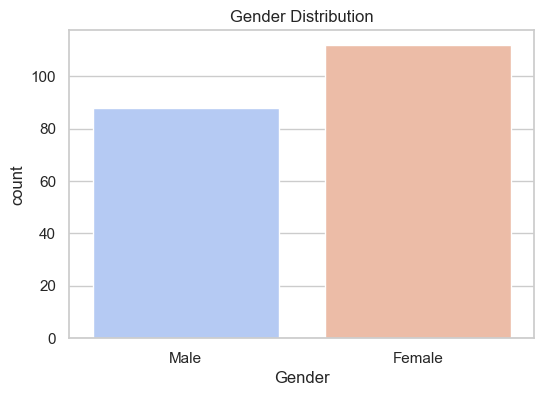

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=data, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()

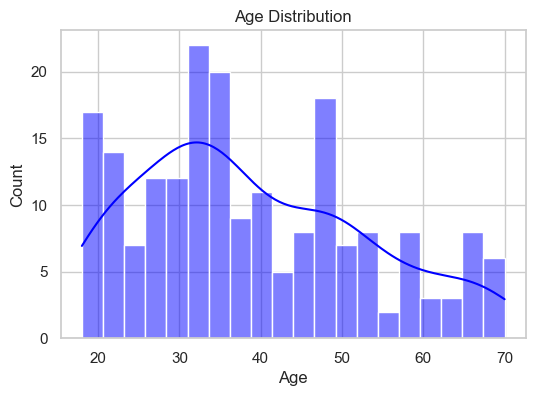

In [39]:
plt.figure(figsize=(6, 4))
sns.histplot(data["Age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\farma\AppData\Local\Temp\ipykernel_9520\200194809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Annual Income (k$)", data=data, palette="magma")


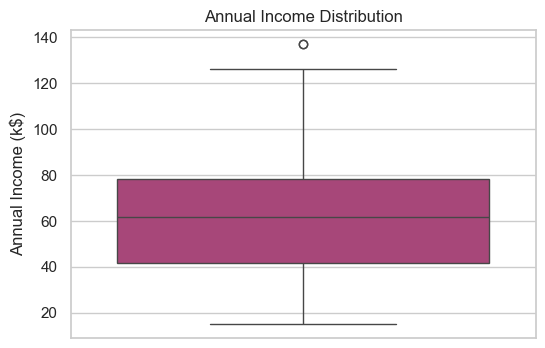

In [40]:
plt.figure(figsize=(6, 4))
sns.boxplot(y="Annual Income (k$)", data=data, palette="magma")
plt.title("Annual Income Distribution")
plt.show()

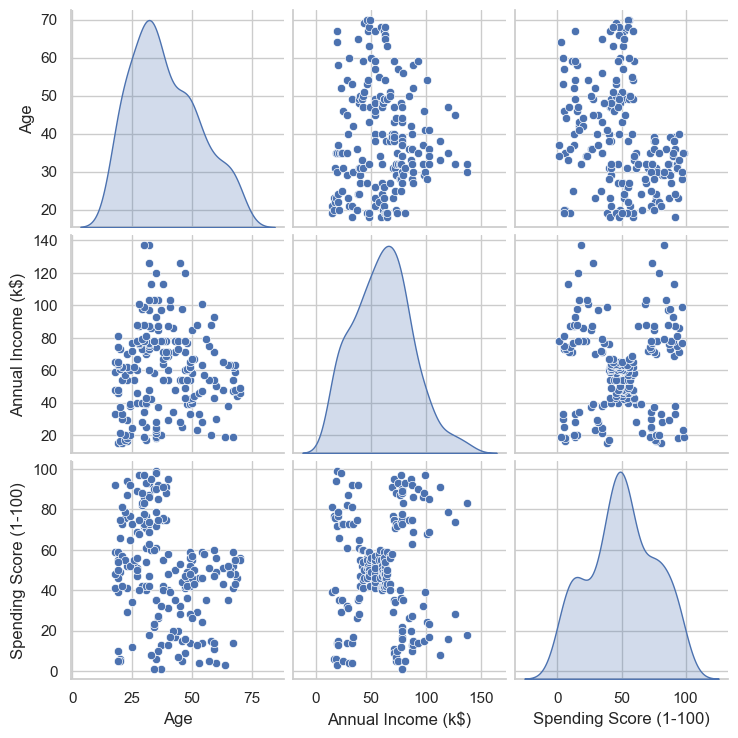

In [41]:
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind="kde")
plt.show()

In [42]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})

In [43]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [44]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [45]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

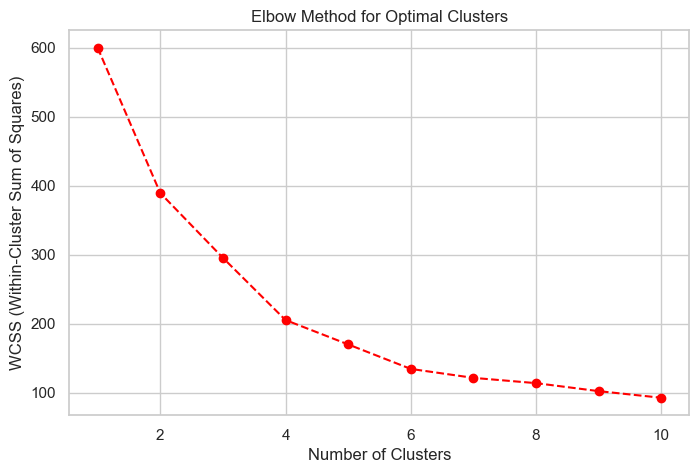

In [46]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color="red")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [47]:
optimal_k = 5  # Adjust based on elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [48]:
data['Cluster'] = clusters

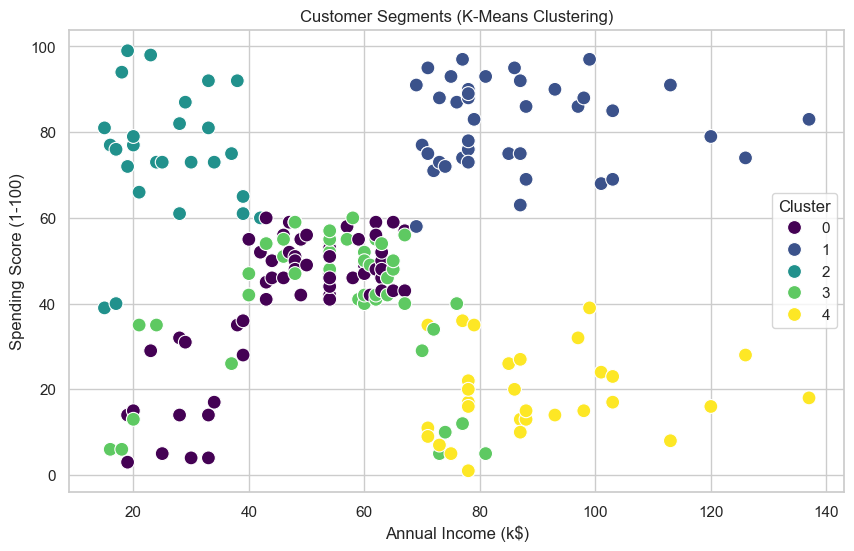

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Annual Income (k$)"], y=data["Spending Score (1-100)"], hue=data["Cluster"], palette="viridis", s=100)
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()

In [50]:
with open("customer_segmentation_model.pkl", "wb") as file:
    pickle.dump(kmeans, file)

print("Model saved as 'customer_segmentation_model.pkl'")

Model saved as 'customer_segmentation_model.pkl'
